In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [95]:
print(tf.__version__)

2.2.0


In [0]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-06-03 12:38:17--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.69MB/s    in 46s     

2020-06-03 12:39:04 (6.65 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
!pip install split_folders

In [0]:
# melakukan ekstraksi pada file zip
import zipfile,os
import split_folders
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

split_folders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/rockpaperscissors/rps-cv-images/data", seed=1337, ratio=(.8,.2))
# base_dir = '/tmp/rockpaperscissors'
# train_dir = os.path.join(data, 'train')
# validation_dir = os.path.join(data, 'val')

Copying files: 2188 files [00:00, 3684.22 files/s]


In [0]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images/data/train')

['scissors', 'rock', 'paper']

In [0]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images/data/val')

['scissors', 'rock', 'paper']

In [0]:
# membuat direktori rock pada direktori data training
train_rock_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data/train', 'rock')

# membuat direktori scissors pada direktori data training
train_scissors_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data/train', 'scissors')

# membuat direktori paper pada direktori data training
train_paper_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data/train', 'paper')

# membuat direktori rock pada direktori data validasi
validation_rock_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data/val', 'rock')

# membuat direktori scissors pada direktori data validasi
validation_scissors_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data/val', 'scissors')

# membuat direktori paper pada direktori data validasi
validation_paper_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data/val', 'paper')

In [0]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [97]:
train_generator = train_datagen.flow_from_directory(
        '/tmp/rockpaperscissors/rps-cv-images/data/train',  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,# karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/tmp/rockpaperscissors/rps-cv-images/data/val', # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical')

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adamax(),
              metrics=['accuracy'])

In [113]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # erapa batch yang akan dieksekusi pada setiap epoch
      verbose=1)

Epoch 1/20
25/25 [==============================] - 1s 37ms/step - loss: 0.3108 - accuracy: 0.9100 - val_loss: 0.0976 - val_accuracy: 0.9500
Epoch 2/20
25/25 [==============================] - 1s 37ms/step - loss: 0.2851 - accuracy: 0.8800 - val_loss: 0.5168 - val_accuracy: 0.8500
Epoch 3/20
25/25 [==============================] - 1s 37ms/step - loss: 0.2421 - accuracy: 0.9100 - val_loss: 0.1805 - val_accuracy: 0.9500
Epoch 4/20
25/25 [==============================] - 1s 37ms/step - loss: 0.2486 - accuracy: 0.9000 - val_loss: 0.2001 - val_accuracy: 0.9000
Epoch 5/20
25/25 [==============================] - 1s 37ms/step - loss: 0.1470 - accuracy: 0.9500 - val_loss: 0.1121 - val_accuracy: 1.0000
Epoch 6/20
25/25 [==============================] - 1s 37ms/step - loss: 0.2097 - accuracy: 0.9300 - val_loss: 0.0925 - val_accuracy: 0.9500
Epoch 7/20
25/25 [==============================] - 1s 36ms/step - loss: 0.2392 - accuracy: 0.9100 - val_loss: 0.4972 - val_accuracy: 0.9000
Epoch 8/20
25

Plot Accuracy and Loss Function
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


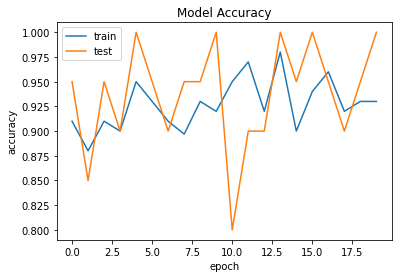

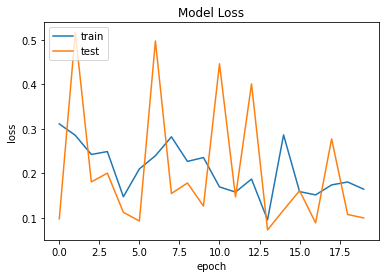

In [114]:
print('Plot Accuracy and Loss Function')

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving 3XNPuMFoaFCfRCVb.png to 3XNPuMFoaFCfRCVb.png
3XNPuMFoaFCfRCVb.png
rock


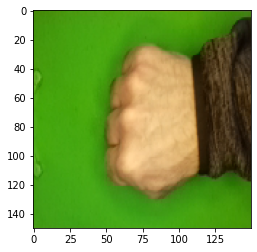

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  hasil = np.argmax(classes)

  print(fn)
  if hasil==0:
    print('paper')
  elif hasil==1:
    print('rock')
  else:
    print('scissors')